# Import Libraries

In [1]:
# Mengimport library yang dibutuhkan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.model_selection import train_test_split
from colorama import Fore, Back, Style
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

C:\Users\user\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Data Loading

In [2]:
# Membuka file datasetnya

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Mengecek jumlah kolom dan baris

df.shape

(299, 13)

Terdapat 299 baris dan 13 kolom pada dataset

In [4]:
# Melihat deskripsi dari dataset

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# Melihat info (Nama kolom dan tipedata) dari dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Cleaning

In [6]:
# Mengubah nama kolom time menjadi day, karna pada kolom time menunjukkan waktu dalam hari. 
# jadi untuk mempermudah diubah menjadi day

df = df.rename(columns={'time': 'day'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  day                       299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# Mengecek missing value pada dataset

df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
day                         0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat missing value

# Data Exploration

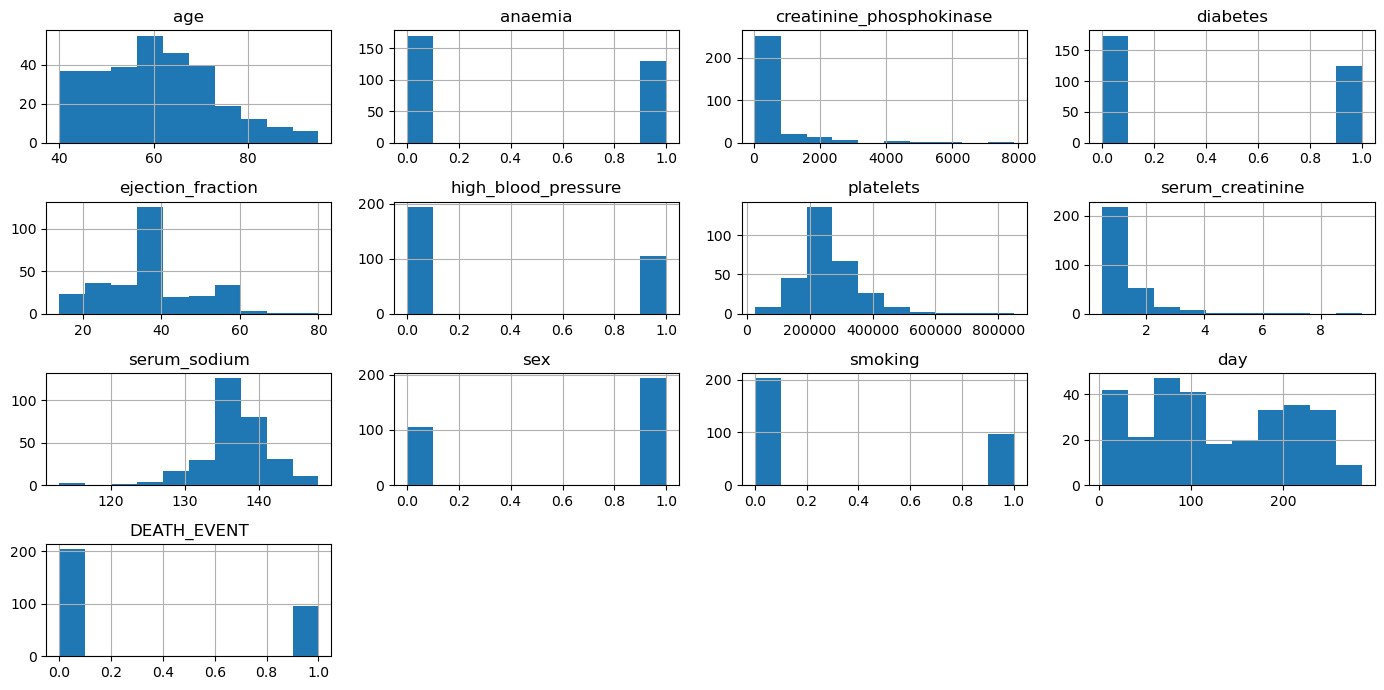

In [8]:
# Melihat persebaran data pada setiap kolom

df.hist(figsize=(14, 7))
plt.tight_layout()
plt.show()

In [9]:
# Analisis Sex pada Death Event
# 0 untuk female dan 1 untuk male

female = df[df["sex"]==0]
male = df[df["sex"]==1]

male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
         len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Sex pada Death Event")
fig.show()

**Kesimpulan**

- Ada sekitar 132 pasien male yang selamat dan ada sekitar 62 pasien male yang tidak selamat
- Ada sekitar 71 pasien female yang selamat dan ada sekitar 34 pasien female yang tidak selamat

In [10]:
# Analisis Umur Dan Gender Pada Death Event

surv = df[df["DEATH_EVENT"]==0]["age"]
not_surv = df[df["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analisis Umur Dan Gender Pada Death Event")
fig.show()

**Kesimpulan**

- Diumur 40 dan 41 semua pasien selamat
- Diumur 94 dan 95 semua pasien tidak ada yang selamat :v

In [11]:
# Analisis Pada Kolom Diabetes

labels = ['No Diabetes','Diabetes']
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Pada Kolom Diabetes")
fig.show()

In [12]:
fig = px.pie(df, values='diabetes',names='DEATH_EVENT', title='Analisis Penderita Diabetes pada Death Event')
fig.show()

In [13]:
diabetes_yes_survi = diabetes_yes[df["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[df["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[df["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[df["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[df["DEATH_EVENT"]==0]),len(diabetes_yes[df["DEATH_EVENT"]==1]),
         len(diabetes_no[df["DEATH_EVENT"]==0]),len(diabetes_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Penderita Diabetes Dan Yang Bukan Pada Death Event")
fig.show()

**Kesimpulan**

- Pada dataset, ada 41,8% pasien penderita diabetes dan 58,2% pasien yang tidak penderita diabetes
- Ada 32% dari penderita diabetes yang meninggal dan 68% penderita diabetes yang selamat
- Ada 39,5% pasien yang tidak menderita diabetes dan 28,4% pasien yang menderita diabetes yang selamat
- Ada 18,7% pasien yang tidak menderita diabetes dan 13,4% pasien yang menderita diabetes yang tidak selamat

In [14]:
# Analisis Pada Kolom Anaemia

anaemia_yes = df[df['anaemia']==1]
anaemia_no = df[df['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Pada Kolom Anaemia")
fig.show()

In [15]:
fig = px.pie(df, values='anaemia',names='DEATH_EVENT', title='Analisis Penderita Anaemia pada Death Event')
fig.show()

In [16]:
anaemia_yes_survi = anaemia_yes[df["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[df["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[df["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[df["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[df["DEATH_EVENT"]==0]),len(anaemia_yes[df["DEATH_EVENT"]==1]),
         len(anaemia_no[df["DEATH_EVENT"]==0]),len(anaemia_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Penderita Anaemia Dan Yang Bukan Pada Death Event")
fig.show()

**Kesimpulan**

- Pada dataset, ada 43,1% pasien penderita anaemia dan 56,9% pasien yang tidak penderita anaemia
- Ada 35,7% dari penderita anaemia yang meninggal dan 64,3% penderita anaemia yang selamat
- Ada 40,1% pasien yang tidak menderita anaemia dan 27,8% pasien yang menderita anaemia yang selamat
- Ada 16,7% pasien yang tidak menderita anaemia dan 15,4% pasien yang menderita anaemia yang tidak selamat

In [17]:
# Analisis Pada Kolom High Blood Pressure

hbp_yes = df[df['high_blood_pressure']==1]
hbp_no = df[df['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Pada Kolom High Blood Pressure")
fig.show()

In [18]:
fig = px.pie(df, values='high_blood_pressure',names='DEATH_EVENT', title='Analisis Penderita High Blood Pressure pada Death Event')
fig.show()

In [19]:
hbp_yes_survi = hbp_yes[df["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[df["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[df["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[df["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[df["DEATH_EVENT"]==0]),len(hbp_yes[df["DEATH_EVENT"]==1]),
         len(hbp_no[df["DEATH_EVENT"]==0]),len(hbp_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Penderita HBP Dan Yang Bukan Pada Death Event)")
fig.show()

**Kesimpulan**

- Pada dataset, ada 35,1% pasien penderita HBP dan 64,9% pasien yang tidak penderita HBP
- Ada 37,1% dari penderita HBP yang meninggal dan 62,9% penderita HBP yang selamat
- Ada 45,8% pasien yang tidak menderita HBP dan 22,1% pasien yang menderita HBP yang selamat
- Ada 19,1% pasien yang tidak menderita HBP dan 13% pasien yang menderita HBP yang tidak selamat

# Data Modeling

In [21]:
Features = ['age','anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','serum_sodium','sex','smoking','day','ejection_fraction','serum_creatinine']
X = df[Features]
y = df["DEATH_EVENT"]

print (f'Dimensi Features : {X.shape}')
print (f'Class : {set(y)}')

Dimensi Features : (299, 12)
Class : {0, 1}


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [31]:
model = RandomForestClassifier(n_estimators =100,
                               random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [32]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



In [35]:
accuracy_list = []

In [48]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
accuracy_list.append(100*acc)

In [49]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  85.00%


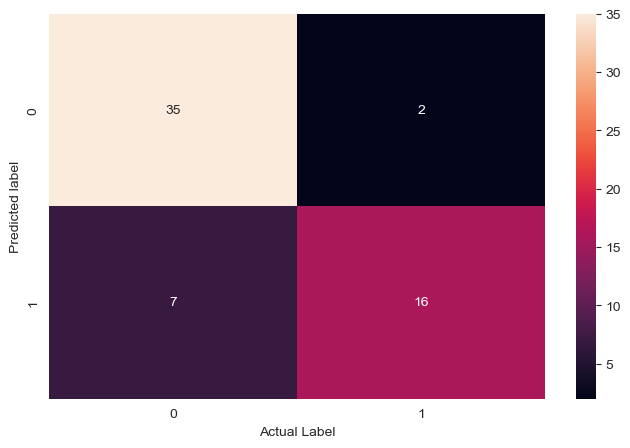

In [50]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Actual Label")
plt.ylabel("Predicted label")
plt.show()

In [82]:
new_data = {
    'age': [40,90,42,57],
    'anaemia': [0,1,1,0],
    'creatinine_phosphokinase': [23,100,500,250],
    'diabetes': [0,0,1,0],
    'high_blood_pressure': [0,0,0,0],
    'platelets': [25,21,22,85],
    'serum_sodium': [113,148,132,114],
    'sex': [0,1,0,0],
    'smoking': [0,1,1,0],
    'day': [4,30,40,50],
    'ejection_fraction': [5,6,8,3],
    'serum_creatinine': [1,8,2,5]
}

new_data = pd.DataFrame(new_data)
new_data

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_sodium,sex,smoking,day,ejection_fraction,serum_creatinine
0,40,0,23,0,0,25,113,0,0,4,5,1
1,90,1,100,0,0,21,148,1,1,30,6,8
2,42,1,500,1,0,22,132,0,1,40,8,2
3,57,0,250,0,0,85,114,0,0,50,3,5


In [83]:
prediksi = model.predict(new_data)
prediksi

array([1, 1, 1, 1], dtype=int64)